In [11]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from sentence_transformers import SentenceTransformer, util
from scipy.spatial import cKDTree
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import normalize
import pickle
import re
from utils.normalizor import normalizor
import tqdm
import math

In [12]:
model = SentenceTransformer('all-roberta-large-v1')
# model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')
# model.load_state_dict(torch.load('model1.pt'))

In [13]:
correct = 0
dif = 0
mp = {}
ma = 0

plotx = []
ploty = []

In [14]:
tree : cKDTree
Comments = []

with open("data/data.pkl", "rb") as f:
    raw = pickle.load(f)
    tree = pickle.loads(raw)

with open("data/comments.pkl", "rb") as f:
    Comments = pickle.load(f)

In [15]:
import string
forbidden = ["is", "am", "are", "This", "for", "the", "of", "on", "the", "a", "easy", "using", "into", "and", "had", "that", "That", "this", "The", "with", "one", "as", "soon", "possible", "in", "here", "depends", "on", "itself", "yourself", "himself", "herself", "Thus", "thus", "at", "return", "but", "we", "do", "in", "case", "The", "no", "it", "doesn't", "even", "Note", "because", "going", "A", "Might", "might", "rather", "than", "to", "seems", "seem", "be", "below", "cause", "won't", "where", "what", "when", "Where", "What", "When", "first", "second", "then", "its", "Copyright", "(C)", "1997", "Jay", "Estabrook", "very"]
for num, (position, comment) in enumerate(Comments):

    for i in forbidden:
        comment = comment.replace(i + " ", "")

    q = tree.query(normalizor(model.encode(comment, convert_to_tensor=False)), 1)[1]
    miny = abs(q - num)
    if abs(q - num) < len(Comments) / 100:
        correct += 1

    plotx.append(num)
    ploty.append(miny)
    if num % 100 == 1:
        print("[{}/{}]({:.2f}%) correct:{}(rate:{:.2f}%)".format(num, len(Comments), num/len(Comments)*100, correct, correct / (num + 1) * 100))

print('{:.2f}%'.format(correct / len(Comments) * 100))

[1/16371](0.01%) correct:0(rate:0.00%)
[101/16371](0.62%) correct:38(rate:37.25%)
[201/16371](1.23%) correct:100(rate:49.50%)
[301/16371](1.84%) correct:148(rate:49.01%)
[401/16371](2.45%) correct:213(rate:52.99%)
[501/16371](3.06%) correct:262(rate:52.19%)
[601/16371](3.67%) correct:331(rate:54.98%)
[701/16371](4.28%) correct:371(rate:52.85%)
[801/16371](4.89%) correct:436(rate:54.36%)
[901/16371](5.50%) correct:510(rate:56.54%)
[1001/16371](6.11%) correct:567(rate:56.59%)
[1101/16371](6.73%) correct:633(rate:57.44%)
[1201/16371](7.34%) correct:686(rate:57.07%)
[1301/16371](7.95%) correct:748(rate:57.45%)
[1401/16371](8.56%) correct:812(rate:57.92%)
[1501/16371](9.17%) correct:854(rate:56.86%)
[1601/16371](9.78%) correct:927(rate:57.87%)
[1701/16371](10.39%) correct:970(rate:56.99%)
[1801/16371](11.00%) correct:1008(rate:55.94%)
[1901/16371](11.61%) correct:1035(rate:54.42%)
[2001/16371](12.22%) correct:1071(rate:53.50%)
[2101/16371](12.83%) correct:1112(rate:52.90%)
[2201/16371](13.4

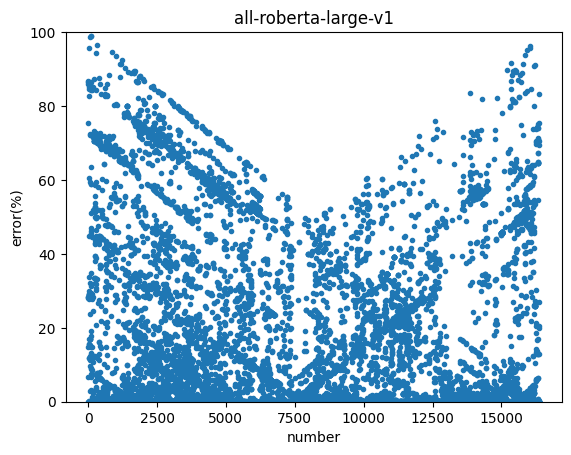

In [16]:
y = [y / len(Comments) * 100 for y in ploty]
plt.plot(plotx, y, '.')
plt.ylim(0, 100)
plt.xlabel("number")
plt.ylabel("error(%)")
plt.title("all-roberta-large-v1")
plt.show()